In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def plot_now(ax1, hash_prec, nonhash_prec, title_str, min_ylim, max_ylim):
    N = 5
    ind = np.arange(N)
    width = 0.35       

    ax1.bar(ind, hash_prec, width, label='Binary vector')
    ax1.bar(ind + width, nonhash_prec, width, label='Semantic vector')

    ax1.set_ylim(min_ylim, max_ylim)

    ax1.set_ylabel('Prec@100')
    ax1.title.set_text(title_str)

    ax1.set_xlabel('Number of bits')
    ax1.set_xticks(ind)
    ax1.set_xticklabels(['8', '16', '32', '64', '128'])


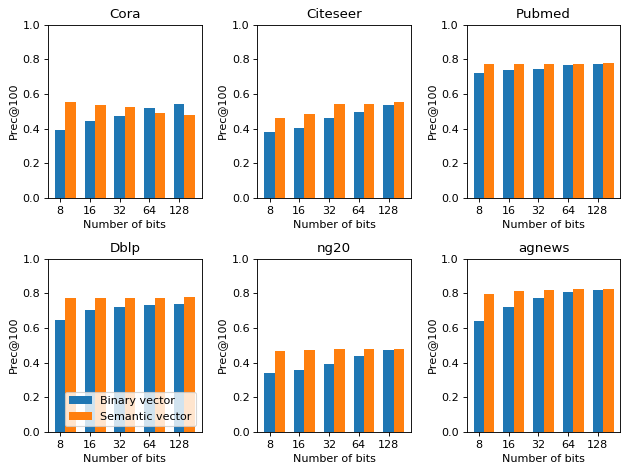

In [3]:
fig = plt.figure(figsize=(8, 6), dpi=80)

# Cora
binary_df = pd.read_csv('binary_logs/binary.Experiment.cora.txt', sep='\t', header=None, 
                         names=['dataset', 'bits', 'samples', 'Prec'])
non_binary_df = pd.read_csv('nonbinary_logs/Nonbinary.Experiment.cora.txt', sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])

ax1 = plt.subplot(231)
plot_now(ax1, list(binary_df.Prec), list(non_binary_df.Prec), "Cora", 0.0, 1.0)

# citeseer
binary_df = pd.read_csv('binary_logs/binary.Experiment.citeseer.txt', sep='\t', header=None, 
                         names=['dataset', 'bits', 'samples', 'Prec'])
non_binary_df = pd.read_csv('nonbinary_logs/Nonbinary.Experiment.citeseer.txt', sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])

ax1 = plt.subplot(232)
plot_now(ax1, list(binary_df.Prec), list(non_binary_df.Prec), "Citeseer", 0.0, 1.0)

# Pubmed
binary_df = pd.read_csv('binary_logs/binary.Experiment.pubmed.txt', sep='\t', header=None, 
                         names=['dataset', 'bits', 'samples', 'Prec'])
non_binary_df = pd.read_csv('nonbinary_logs/Nonbinary.Experiment.pubmed.txt', sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])

ax1 = plt.subplot(233)
plot_now(ax1, list(binary_df.Prec), list(non_binary_df.Prec), "Pubmed", 0.0, 1.0)

# Dblp
binary_df = pd.read_csv('binary_logs/binary.Experiment.dblp.txt', sep='\t', header=None, 
                         names=['dataset', 'bits', 'samples', 'Prec'])
non_binary_df = pd.read_csv('nonbinary_logs/Nonbinary.Experiment.pubmed.txt', sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])

ax1 = plt.subplot(234)
plot_now(ax1, list(binary_df.Prec), list(non_binary_df.Prec), "Dblp", 0.0, 1.0)
ax1.legend(loc='lower right')

# ng20
binary_df = pd.read_csv('binary_logs/binary.Experiment.ng20.txt', sep='\t', header=None, 
                         names=['dataset', 'bits', 'samples', 'Prec'])
non_binary_df = pd.read_csv('nonbinary_logs/Nonbinary.Experiment.ng20.txt', sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])

ax1 = plt.subplot(235)
plot_now(ax1, list(binary_df.Prec), list(non_binary_df.Prec), "ng20", 0.0, 1.0)

# agnews
binary_df = pd.read_csv('binary_logs/binary.Experiment.agnews.txt', sep='\t', header=None, 
                         names=['dataset', 'bits', 'samples', 'Prec'])
non_binary_df = pd.read_csv('nonbinary_logs/Nonbinary.Experiment.agnews.txt', sep='\t', header=None, 
                             names=['dataset', 'bits', 'samples', 'Prec'])

ax1 = plt.subplot(236)
plot_now(ax1, list(binary_df.Prec), list(non_binary_df.Prec), "agnews", 0.0, 1.0)

plt.tight_layout()


In [4]:
fig.savefig("nonhash_experiment.pdf", bbox_inches='tight')